## 株価系列の統計量の取得

In [2]:
import datetime 
import pandas_datareader.data as web
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import scipy.stats as sp
%matplotlib inline

In [4]:
start = datetime.datetime(2013, 11, 4)
end   = datetime.datetime(2018, 11,4)
stocks = web.DataReader(["NIKKEI225","SP500"], "fred", start, end).fillna(method="bfill")

In [5]:
stocks.head()

,NIKKEI225,SP500
DATE,,
2013-11-04,14225.37,1767.93
2013-11-05,14225.37,1762.97
2013-11-06,14337.31,1770.49
2013-11-07,14228.44,1747.15
2013-11-08,14086.80,1770.61


### 標準化

,NIKKEI225,SP500
DATE,,
2013-11-04,-1.657492,-1.469512
2013-11-05,-1.657492,-1.485328
2013-11-06,-1.615293,-1.461349
2013-11-07,-1.656334,-1.535772
2013-11-08,-1.709729,-1.460967


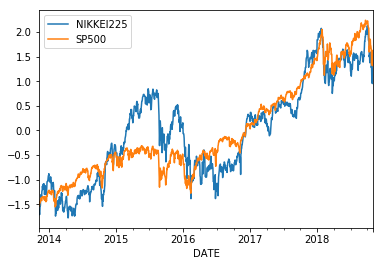

In [6]:
#standardization
z = stocks.apply(lambda x: ((x-x.mean())/x.std()),axis = 0)
z.plot()
z.head()

### 変動量

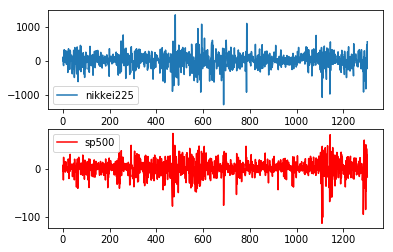

In [30]:
nikkei225_diff = np.diff(stocks.NIKKEI225)
sp500_diff = np.diff(stocks.SP500)
fig = plt.figure()
ax1  =fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(nikkei225_diff, label = "nikkei225")
ax2.plot(sp500_diff, label = "sp500",color= "r")
ax1.legend(loc  = "lower left")
ax2.legend()

### 価格変動率

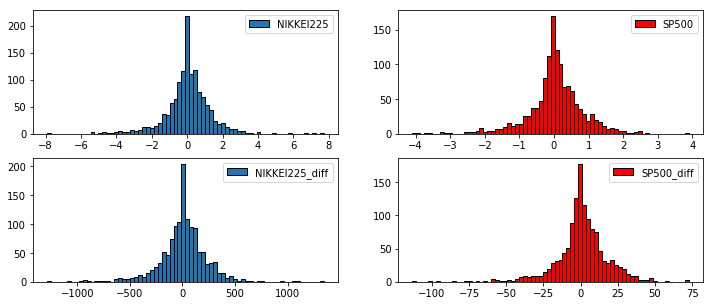

In [32]:
pct_stocks= stocks.apply(lambda x : x.pct_change()*100).dropna()
fig = plt.figure(figsize=(12,5))
ax1  =fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 =  fig.add_subplot(2,2,4)

ax1.hist(pct_stocks.ix[:,0], bins = 70,label = "NIKKEI225",edgecolor = "black")
ax2.hist(pct_stocks.ix[:,1] ,color= "r",bins = 70,label = "SP500",edgecolor = "black")
ax3.hist(nikkei225_diff, bins = 70,label = "NIKKEI225_diff",edgecolor = "black")
ax4.hist(sp500_diff, bins = 70, color = "r",label = "SP500_diff",edgecolor = "black")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

### 変動量系列のコレログラム

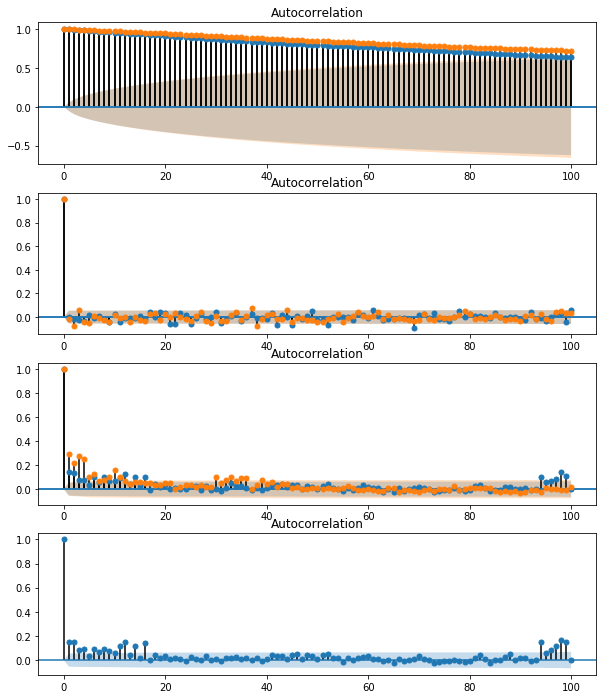

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

LAG = 100
nikkei225_diff2 = nikkei225_diff**2
sp500_diff2 = sp500_diff**2
pp =pct_stocks.ix[:,0]**2

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
#draw correlogram 
sm.graphics.tsa.plot_acf(nikkei225,lags = LAG,ax =ax1) # blew area is 95% confidential interval
sm.graphics.tsa.plot_acf(sp500,lags = LAG,ax =ax1)
sm.graphics.tsa.plot_acf(nikkei225_diff,lags = LAG,ax =ax2)
sm.graphics.tsa.plot_acf(sp500_diff,lags = LAG,ax =ax2)
sm.graphics.tsa.plot_acf(nikkei225_diff2,lags = LAG,ax =ax3)
sm.graphics.tsa.plot_acf(sp500_diff2,lags = LAG,ax =ax3)
sm.graphics.tsa.plot_acf(pp,lags = LAG,ax =ax4)

plt.show()

In [53]:
def autocorrelation(y,lag):
    y_mean = np.mean(y)
    k = 1
    rk = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)
    return rk
print(autocorrelation(sp500_diff2,1))
print(autocorrelation(nikkei225_diff2,1))

pp = pct_stocks.ix[:,0].values**2
print(autocorrelation(pp,1))


0.294753139462
0.145736785599
0.146474480969


### 価格変動率の±σ内，±3σ外の確率

In [16]:
x  = pct_stocks.ix[:,0]
y = pct_stocks.ix[:,1]

def sigma(x):
    in_1sigma = len([i for i in x if np.average(x)-np.std(x)<i<np.average(x)+np.std(x)])/len(x)
    out_3sigma = len([i for i in x if i<np.average(x)-np.std(x)*2 or i>np.average(x)+np.std(x)*2])/len(x)
    return round(in_1sigma,3) , round(out_3sigma,3)

print ("nikkei225:",sigma(x))
print("sp500:",sigma(y))
print ("nikkei225_diff:",sigma(nikkei225_diff))
print("sp500_diff:",sigma(sp500_diff))

nikkei225: (0.784, 0.054)
sp500: (0.768, 0.061)
nikkei225_diff: (0.765, 0.054)
sp500_diff: (0.762, 0.057)


(0.765, 0.054)

★収益率として
$$
\frac{p_t-p_{t-1}}{p_t}
$$
$$
\log{p_t}-\log{p_{t-1}}
$$
$$
p_t-p_{t-1}
$$

どれを用いても1.5の値は変わらない．標準化は全く同じ結果．

### 尖度

In [24]:
nikkei_moment4 = sp.kurtosis(nikkei225_diff)
sp500_moment4 = sp.kurtosis(sp500_diff)
print ("nikkei225:", round(nikkei_moment4,3))
print("sp500:",round(sp500_moment4,3))

nikkei225: 4.666
sp500: 5.045
